In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

***
### Описание данных

**assessments.csv** — этот файл содержит информацию об оценках в тесте. Обычно каждый предмет в семестре включает ряд тестов с оценками, за которыми следует заключительный экзаменационный тест (экзамен).

* code_module — идентификационный код предмета.
* code_presentation — семестр (Идентификационный код).
* id_assessment — тест (Идентификационный номер ассессмента).
* assessment_type — тип теста. Существуют три типа оценивания: оценка преподавателя (TMA), компьютерная оценка (СМА), экзамен по курсу (Exam).
* date — информация об окончательной дате сдачи теста. Рассчитывается как количество дней с момента начала семестра. Дата начала семестра имеет номер 0 (ноль).
* weight — вес теста в % в оценке за курс. Обычно экзамены рассматриваются отдельно и имеют вес 100%; сумма всех остальных оценок составляет 100%.

**courses.csv** — файл содержит список предметов по семестрам.

* code_module — предмет (идентификационный код).
* code_presentation — семестр (идентификационный код).
* module_presentation_length — продолжительность семестра в днях.

**studentAssessment.csv** — этот файл содержит результаты тестов студентов. Если учащийся не отправляет работу на оценку, результат не записывается в таблицу.

* id_assessment — тест (идентификационный номер).
* id_student — идентификационный номер студента.
* date_submitted — дата сдачи теста студентом, измеряемая как количество дней с начала семестра.
* is_banked — факт перезачета теста с прошлого семестра (иногда курсы перезачитывают студентам, вернувшимся из академического отпуска).
* score — оценка учащегося в этом тесте. Диапазон составляет от 0 до 100. Оценка ниже 40 неудачная/неуспешная сдача теста.

**studentRegistration.csv** — этот файл содержит информацию о времени, когда студент зарегистрировался для прохождения курса в семестре.

* code_module — предмет (идентификационный код).
* code_presentation — семестр (идентификационный код).
* id_student — идентификационный номер студента.
* date_registration — дата регистрации студента. Это количество дней, измеренное от начала семестра (например, отрицательное значение -30 означает, что студент зарегистрировался на прохождение курса за 30 дней до его начала).
* date_unregistration — дата отмены регистрации студента с предмета. У студентов, окончивших курс, это поле остается пустым.
***

In [2]:
assessments = pd.read_csv('assessments.csv')
courses = pd.read_csv('courses.csv')
studentAssessment = pd.read_csv('studentAssessment.csv')
studentRegistration = pd.read_csv('studentRegistration.csv')

Рассмотрим каждый датафрейм подробнее. Начнем с **assessments.**

In [3]:
assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [4]:
assessments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


В колонке *date* присутствуют пропущенные значения. Рассмотрим их.

In [5]:
assessments_with_missing_date = assessments[assessments.date.isna()]
assessments_with_missing_date

,code_module,code_presentation,id_assessment,assessment_type,date,weight
5,AAA,2013J,1757,Exam,NaN,100.0
11,AAA,2014J,1763,Exam,NaN,100.0
23,BBB,2013B,14990,Exam,NaN,100.0
35,BBB,2013J,15002,Exam,NaN,100.0
47,BBB,2014B,15014,Exam,NaN,100.0
53,BBB,2014J,15025,Exam,NaN,100.0
62,CCC,2014B,24290,Exam,NaN,100.0
63,CCC,2014B,40087,Exam,NaN,100.0
72,CCC,2014J,24299,Exam,NaN,100.0
73,CCC,2014J,40088,Exam,NaN,100.0


Оказалось, что у некоторых предметов нет окончательной даты сдачи экзамена... Посмотрим, есть ли студенты, выполнявшие итоговые работы по этим предметам.

In [6]:
id_assessmen_with_missing_date = list(assessments_with_missing_date.id_assessment)
students_without_final_exam_date_assessment  = studentAssessment.query('id_assessment in @id_assessmen_with_missing_date')
students_without_final_exam_date_assessment

,id_assessment,id_student,date_submitted,is_banked,score
52923,24290,558914,230,0,32.0
52924,24290,559706,234,0,78.0
52925,24290,559770,230,0,54.0
52926,24290,560114,230,0,64.0
52927,24290,560311,234,0,100.0
...,...,...,...,...,...
95980,25368,652680,243,0,91.0
95981,25368,652732,249,0,47.0
95982,25368,652965,242,0,87.0
95983,25368,653051,242,0,27.0


Заметим, что в колонке *id_assessment* получившейся таблицы значения начинаются с 24290, а не с 1757, как в таблице **assessments_with_missing_date**. Возможно, нет данных о некоторых *id_assessment* в таблице **studentAssessment**. Проверим это.

In [7]:
id_assessment_studentAssessment = list(students_without_final_exam_date_assessment.id_assessment)
exams_without_data = list(set(id_assessmen_with_missing_date) - set(id_assessment_studentAssessment))
exams_without_data

[1763, 15014, 14990, 15025, 40087, 40088, 15002, 1757]

Получившийся список *exams_without_data* представляет собой работы, которые являются экзаменами. Их не делал ни один студент. Или же это утерянные данные, которые почему-то не внесли в **studentAssessment**. Интересно узнать почему так.

In [8]:
assessments_with_missing_date = assessments_with_missing_date.drop(['id_assessment', 'assessment_type', 'date', 'weight'], axis=1)

In [9]:
df1 = pd.merge(assessments_with_missing_date, studentRegistration, on=['code_module', 'code_presentation'], how='inner')

In [10]:
df2 = pd.merge(df1, studentAssessment, on='id_student', how='inner')

In [11]:
# исключаю из данных возможные прошедшие экзамены, чтобы рассчитать средний балл за предмет по сделанным заданям
# также оставляю только успешно закончивших курс студентов

df2 = df2.query('id_assessment not in @id_assessmen_with_missing_date and date_unregistration == "NaN"')

In [12]:
df3 = df2 \
    .groupby(['code_module', 'id_student'], as_index=0) \
    .agg(average_score=('score', 'mean'))

In [13]:
df3.query('average_score < 40')

,code_module,id_student,average_score
108,AAA,175991,37.600000
247,AAA,334441,39.800000
398,AAA,852847,34.500000
412,AAA,1401935,35.000000
519,AAA,2456480,24.666667
...,...,...,...
8877,DDD,651267,0.000000
8986,DDD,678058,32.666667
9057,DDD,684305,32.750000
9121,DDD,689527,34.333333


In [14]:
studentAssessment.query('id_student == 2456480')

,id_assessment,id_student,date_submitted,is_banked,score
301,1752,2456480,23,0,40.0
441,1753,2456480,54,0,34.0
785,1754,2456480,123,0,0.0


In [15]:
studentRegistration.query('id_student == 2456480')

,code_module,code_presentation,id_student,date_registration,date_unregistration
319,AAA,2013J,2456480,-71.0,NaN


### Итог

Я высчитал средний балл студентов по предметам, у которых отсутствовала дата экзамена. Было предположение, что, возможно, по этим предметам можно получить так называемый "автомат" и закончить курс по результатам сделанных работ без экзамена. Если средний балл по всем заданиям выше, например, 40, то можно поставить "автомат", если нет, то сдается экзамен. Полученные результаты опровергают это предположение. Был выбран студент *id_student == 2456480*, который успешно закончил курс. Его средний балл равен 24.666667. Есть данные только по трем сделанным работам без экзамена, среди которых сдана успешно только одна. Также нет перезачетов тестов с прошлого семестра. Таким образом отсутствие дат по экзаменам можно объяснить их утерей.

Теперь перейдем к датафрейму **courses.**

In [16]:
courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [17]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


In [18]:
courses.describe()

,module_presentation_length
count,22.000000
mean,255.545455
std,13.654677
min,234.000000
25%,241.000000
50%,261.500000
75%,268.000000
max,269.000000


Здесь с данными все хорошо, нет пропусков. Средняя (здесь подразумевается медиана, просто со словом "средняя" звучит лучше :) ) продолжительность курса составляет 261.5 дней, это больше полугода. Курсов получается 22.

Переходим к **studentAssessment.**

In [19]:
studentAssessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [20]:
studentAssessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


Есть пропущенные значения в колонке *score*. Думаю, что это можно объяснить аналогично пропускам в датафрейме **assessments.** Просто утерянные данные.

Переходим к **studentRegistration.**

In [21]:
studentRegistration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [22]:
studentRegistration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


Есть пропуски в колонках *date_registration* и *date_unregistration*. Пропуски в *date_unregistration* объясняются тем, что у студентов, окончивших курс, это поле остается пустым. Посмотрим на пропуски в *date_registration*.

In [23]:
studentRegistration.query('date_registration == "NaN"').head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
2344,BBB,2013B,630346,NaN,NaN
2538,BBB,2013J,57369,NaN,-1.0
2759,BBB,2013J,342678,NaN,-33.0
5356,BBB,2014B,582496,NaN,-126.0
5490,BBB,2014B,607646,NaN,-38.0


Думаю, что эти пропуски объясняются утерей данных.

Перейдем к определению того, что можно считать курсом.

In [24]:
student_assignment = studentRegistration \
    .groupby('id_student', as_index=0) \
    .agg(count_of_courses=('code_module', 'count'))
student_assignment.head()

,id_student,count_of_courses
0,3733,1
1,6516,1
2,8462,2
3,11391,1
4,23629,1


In [25]:
student_assignment.count_of_courses.describe()

count    28785.000000
mean         1.132291
std          0.367915
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          5.000000
Name: count_of_courses, dtype: float64

Под курсом будем понимать сочетание предмета *(code_module)* и семестра *(code_presentation)*. Каждый курс характеризуется уникальным идентификатором *(code_module)* и кодом семестра *(code_presentation)*.
Ранее было рассмотрено, что у предметов есть экзамены, которые проводят в конце обучения. Также у предметов есть привязка к конкретному семестру, что показывает разграничения учебных программ. Сейчас был получен датафрейм, который содержит в себе айди студентов и кол-во их выбранных курсов. Подавляющее большинство студентов имеют только 1 курс. Значит, можно предположить, что курсы с одинаковым *code_module* никак не связаны между собой. Исходя из этого нельзя утверждать, что, например, курс - это один предмет длиной в два семестра. Курс - это уникальный идентификатор предмета *(code_module)* в определенном семестре *(code_presentation)*. Каждый курс заканчивается экзаменом.

## 1. Сколько студентов успешно сдали только один курс? (Успешная сдача — это зачёт по курсу на экзамене).

Чтобы успешно сдать курс, нужно получить на экзамене не менее 40 баллов. Объединим датафреймы **assessments** и **studentAssessment**. Затем из всех студентов отберем только тех, кто набрал >= 40 баллов за экзамен. Далее отберем тех, кто успешно сдал только один курс.

In [26]:
assessments_and_result = pd.merge(assessments, studentAssessment, on='id_assessment', how='inner')
successful_result = assessments_and_result.query('assessment_type == "Exam" and score >= 40')
count_of_successful_results = successful_result \
    .groupby('id_student', as_index=0) \
    .agg(count_of_exam=('score', 'count'))
count_of_successful_results.query('count_of_exam == 1').shape[0]

3802

**Количество студентов, успешно сдавших только один курс, равно 3802**

## 2. Выяви самый сложный и самый простой экзамен: найди курсы и экзамены в рамках курса, которые обладают самой низкой и самой высокой завершаемостью.

Для решения поставленной задачи воспользуемся уже готовым датафреймом **assessments_and_result.** Отберем только экзамены. Далее сгруппируем данные по *code_module*, *code_presentation* и *id_assessment*, подсчитав общее и успешное количество попыток сдать экзамен. Затем найдем отношение успешной сдачи к общему количеству. Ответом будут курсы и экзамены с максимальным и минимальным значением.

In [27]:
only_exams = assessments_and_result.query('assessment_type == "Exam"')

In [28]:
pass_rate = only_exams \
    .groupby(['code_module', 'code_presentation', 'id_assessment'], as_index=0) \
    .agg(total=('id_student', 'count'), successful=('score', lambda x: (x >= 40).sum()))

In [29]:
pass_rate['ratio'] = pass_rate.successful / pass_rate.total
pass_rate = pass_rate.sort_values('ratio')

In [30]:
pass_rate

,code_module,code_presentation,id_assessment,total,successful,ratio
2,DDD,2013B,25340,602,504.0,0.837209
1,CCC,2014J,24299,1168,1019.0,0.872432
5,DDD,2014J,25368,950,842.0,0.886316
0,CCC,2014B,24290,747,664.0,0.888889
3,DDD,2013J,25354,968,878.0,0.907025
4,DDD,2014B,25361,524,485.0,0.925573


**Самый сложный экзамен - 25340, он относится к курсу DDD в 2013B семестре, самый простой - 25361, относится к курсу DDD в 2014B семестре.**

## 3. По каждому предмету определи средний срок сдачи экзаменов (под сдачей понимаем последнее успешное прохождение экзамена студентом).

Будем использовать датафрейм **only_exams**, в котором отберем студентов, которые успешно сдали экзамен. 

In [31]:
only_exams

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score
52923,CCC,2014B,24290,Exam,NaN,100.0,558914,230,0,32.0
52924,CCC,2014B,24290,Exam,NaN,100.0,559706,234,0,78.0
52925,CCC,2014B,24290,Exam,NaN,100.0,559770,230,0,54.0
52926,CCC,2014B,24290,Exam,NaN,100.0,560114,230,0,64.0
52927,CCC,2014B,24290,Exam,NaN,100.0,560311,234,0,100.0
...,...,...,...,...,...,...,...,...,...,...
95980,DDD,2014J,25368,Exam,NaN,100.0,652680,243,0,91.0
95981,DDD,2014J,25368,Exam,NaN,100.0,652732,249,0,47.0
95982,DDD,2014J,25368,Exam,NaN,100.0,652965,242,0,87.0
95983,DDD,2014J,25368,Exam,NaN,100.0,653051,242,0,27.0


Проверим, есть ли студенты, которые сдавали один и тот же экзамен более одного раза.

In [32]:
test = only_exams \
    .groupby(['id_student', 'id_assessment'], as_index=0) \
    .agg(count=('score', 'count'))
test.query('count > 1')

,id_student,id_assessment,count


Таких студентов нет, поэтому дату сдачи экзамена каждого студента будем считать последней для него.

Оставим только сдавших экзамены студентов.

In [33]:
only_exams_successful = only_exams.query('score >= 40')

In [34]:
average_time = only_exams_successful \
    .groupby('code_module', as_index=0) \
    .agg(avg_time=('date_submitted', 'mean'))
average_time

,code_module,avg_time
0,CCC,239.345217
1,DDD,237.976006


Данные по результатам экзаменов имеют предметы CCC и DDD, поэтому расчитан средний срок сдачи только для них.

**Средний срок сдачи экзаменов по предмету CCC составляет 239 дней, по предмету DDD - 238 дней.**

## 4. Выяви самые популярные предметы (ТОП-3) по количеству регистраций на них. А также предметы с самым большим оттоком (ТОП-3).

Для выявления самых популярных предметов по количеству регистрации воспользуемся датафреймом **studentRegistration.** Сгруппируем данные по *code_module* и посчитаем кол-во зарегистрировавшихся студентов.

In [35]:
top_courses = studentRegistration \
    .groupby('code_module', as_index=0) \
    .agg(count_of_registrations=('id_student', 'nunique')) \
    .sort_values('count_of_registrations', ascending=0)

Для наглядности визуализируем данные.

Text(0, 0.5, 'Кол-во регистраций')

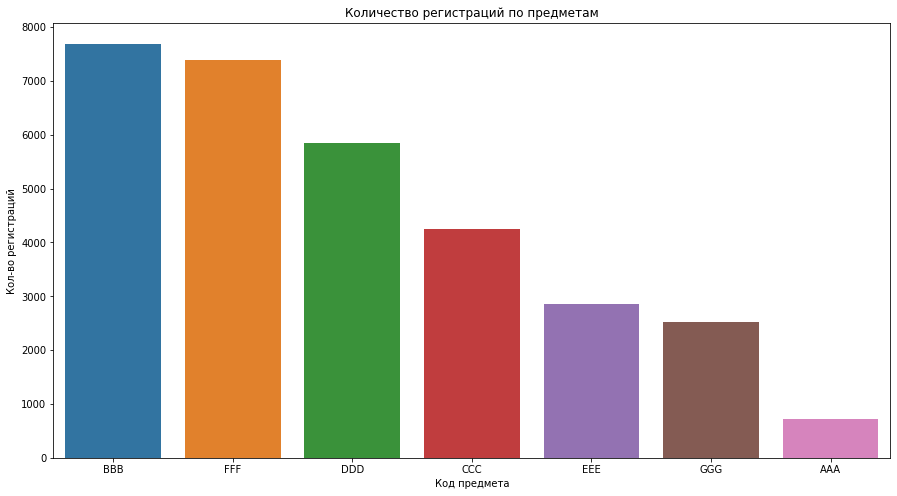

In [36]:
plt.figure(figsize=(15,8))
sns.barplot(data=top_courses, x='code_module', y='count_of_registrations')
plt.title('Количество регистраций по предметам')
plt.xlabel('Код предмета')
plt.ylabel('Кол-во регистраций')

Выведем топ-3 предмета по регистрациям.

In [37]:
top_courses.head(3)

,code_module,count_of_registrations
1,BBB,7692
5,FFF,7397
3,DDD,5848


Для выявления предметов с самым большим оттоком сначала определимся что будем считать оттоком. Отток - это не просто кол-во студентов, которые отменили регистрацию. Такой подход не логичен, так как не показывают всю картину. Например, на один курс записались 40 человек, отменили регистрацию 35. На другой записались 1000 человек, отменили регистрацию 50. По кол-ву отмен регистраций лидирует второй курс, но нельзя сказать, что на нем больше оттока. Отток - это отношение между кол-вом отмен и кол-вом регистраций. Чем больше это значение, тем больше студентов отменили регистрацию.

Сначала отберем студентов, которые отменили регистрацию на предмет. Далее посчитаем для каждого предмета кол-во отменивших регистрацию. Объединим получившийся датафрейм с **top_courses**, в котором посчитано кол-во регистраций. Затем высчитаем отношение между кол-вом отмен и кол-вом регистраций.

In [38]:
unregistration_courses = studentRegistration.query('date_unregistration != "NaN"')
unregistration_courses = unregistration_courses \
    .groupby('code_module', as_index=0) \
    .agg(count_of_unregistrations=('id_student', 'nunique')) \
    .sort_values('count_of_unregistrations')
top_unregistration_courses = pd.merge(top_courses, unregistration_courses, on='code_module', how='inner')
top_unregistration_courses['percent'] = (top_unregistration_courses.count_of_unregistrations
                                         / top_unregistration_courses.count_of_registrations) * 100
top_unregistration_courses = top_unregistration_courses.sort_values('percent', ascending=0)

Визуализируем данные.

Text(0, 0.5, 'Процент отменивших регистрацию студентов')

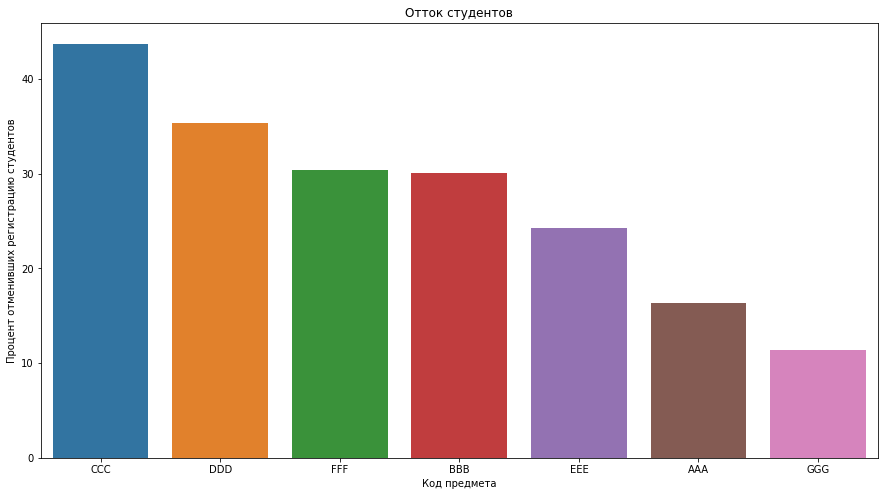

In [39]:
plt.figure(figsize=(15,8))
sns.barplot(data=top_unregistration_courses, x='code_module', y='percent')
plt.title('Отток студентов')
plt.xlabel('Код предмета')
plt.ylabel('Процент отменивших регистрацию студентов')

Выведем топ-3 предмета по оттокам.

In [40]:
top_unregistration_courses.head(3)

,code_module,count_of_registrations,count_of_unregistrations,percent
3,CCC,4251,1858,43.707363
2,DDD,5848,2065,35.311218
1,FFF,7397,2249,30.404218


**Топ-3 популярных предмета по кол-ву регистраций: BBB, FFF, DDD. Топ-3 предмета с самым большим оттоком: CCC, DDD, FFF.**

## 5. Используя pandas, в период с начала 2013 по конец 2014 выяви семестр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов.

У нас уже есть датафрейм с экзаменами **only_exams,** будем использовать его. Сгруппируем данные по семестрам, посчитаем общее и успешное количество попыток сдать экзамен. Затем найдем отношение успешной сдачи к общему количеству.

In [41]:
course_completions = only_exams \
    .groupby('code_presentation', as_index=0) \
    .agg(total=('id_student', 'count'), successful=('score', lambda x: (x >= 40).sum()))

In [42]:
course_completions['ratio'] = course_completions.successful / course_completions.total
course_completions = course_completions.sort_values('ratio')

In [43]:
course_completions

,code_presentation,total,successful,ratio
0,2013B,602,504.0,0.837209
3,2014J,2118,1861.0,0.878659
2,2014B,1271,1149.0,0.904013
1,2013J,968,878.0,0.907025


Семестром с самой низкой завершаемостью оказался 2013B.

Для выявления семестра с самыми долгими средними сроками сдачи курсов будем использовать имеющийся датафрейм **only_exams_successful.**

In [44]:
average_time_semester = only_exams_successful \
    .groupby('code_presentation', as_index=0) \
    .agg(avg_time=('date_submitted', 'mean')) \
    .sort_values('avg_time')
average_time_semester

,code_presentation,avg_time
0,2013B,230.164683
2,2014B,232.997389
1,2013J,239.509112
3,2014J,243.680279


Семетр с самыми долгими средними сроками сдачи курсов - 2014J.

**Таким образом, семестр с самой низкой завершаемостью - 2013B, семетр с самыми долгими средними сроками сдачи курсов - 2014J.**

## 6. Используя python, построй адаптированные RFM-кластеры студентов, чтобы качественно оценить аудиторию.

Сначала необходимо рассчитать метрики RFM:
1. R - среднее время сдачи одного экзамена;
2. F - завершаемость курсов;
3. M - среднее количество баллов, получаемое за экзамен.

Начнем со среднего времени сдачи одного экзамена. Так как под сдачей понимаем последнее успешное прохождение экзамена студентом, то используем датафрейм **only_exams_successful,** который содержит в себе информацию об успешных сдачах экзаменов.

In [45]:
rfm = only_exams_successful \
    .groupby('id_student', as_index=0) \
    .agg(Recency=('date_submitted', 'mean'))
rfm.head()

,id_student,Recency
0,23698,243.0
1,24213,236.0
2,27116,243.0
3,28046,237.0
4,28787,243.0


Теперь рассчитаем завершаемость курсов. Для этого необходимо знать общее и успешное количество попыток сдать экзамен. Будем использовать полученный ранее датафрейм **only_exams,** в котором находится информация обо всех экзаменах и результатах студентов по ним.

In [46]:
df6 = only_exams \
    .groupby('id_student', as_index=0) \
    .agg(total=('score', 'count'), successful=('score', lambda x: (x >= 40).sum()))
df6['Frequency'] = df6.successful / df6.total

In [47]:
rfm = pd.merge(rfm, df6[['id_student', 'Frequency']], on='id_student', how='outer') \
    .fillna(0)
rfm.head()

,id_student,Recency,Frequency
0,23698,243.0,1.0
1,24213,236.0,1.0
2,27116,243.0,1.0
3,28046,237.0,1.0
4,28787,243.0,1.0


Теперь рассчитаем среднее количество баллов, получаемое за экзамен. Опять будем использовать датафрейм **only_exams.**

In [48]:
exam_scores = only_exams \
    .groupby('id_student', as_index=0) \
    .agg(Monetary=('score', 'mean'))

In [49]:
rfm = pd.merge(rfm, exam_scores, on='id_student', how='inner')
rfm.head()

,id_student,Recency,Frequency,Monetary
0,23698,243.0,1.0,80.0
1,24213,236.0,1.0,58.0
2,27116,243.0,1.0,96.0
3,28046,237.0,1.0,40.0
4,28787,243.0,1.0,44.0


Посмотрим на статистические данные.

In [50]:
rfm.describe()

,id_student,Recency,Frequency,Monetary
count,4.633000e+03,4633.000000,4633.000000,4633.000000
mean,7.256904e+05,210.877725,0.881286,65.117958
std,5.753498e+05,76.466522,0.321142,20.470561
min,2.369800e+04,0.000000,0.000000,0.000000
25%,5.011580e+05,230.000000,1.000000,50.000000
50%,5.884820e+05,237.000000,1.000000,66.000000
75%,6.463510e+05,243.000000,1.000000,82.000000
max,2.698251e+06,285.000000,1.000000,100.000000


По ним сложно понять на какие сегменты нужно делить метрики.

Рассмотрим уникальные значения *Frequency*.

In [51]:
rfm.Frequency.unique()

array([1. , 0.5, 0. ])

Можно разделить метрику завершаемости курса на 3 сегмента: 0 - ни один курс не завершен, 0.5 - половина курсов завершена, 1 - все курсы завершены.

Для метрик Recency и Monetary рассчитаем квантили.

In [52]:
quantiles = rfm[['Recency', 'Monetary']].quantile(q=[0.25, 0.5, 0.75]).to_dict()
quantiles

{'Recency': {0.25: 230.0, 0.5: 237.0, 0.75: 243.0},
 'Monetary': {0.25: 50.0, 0.5: 66.0, 0.75: 82.0}}

Будем присваивать ранги от 1 до 4 включительно (кроме Frequency). Чем меньше Recency, тем лучше. У Frequency и Monetary наоборот, чем они больше, тем лучше. Напишем функции для ранжирования.

In [53]:
def r_score(value):
    if value <= quantiles['Recency'][0.25]:
        return 4
    elif value <= quantiles['Recency'][0.5]:
        return 3
    elif value <= quantiles['Recency'][0.75]:
        return 2
    else:
        return 1

def f_score(value):
    if value == 0:
        return 1
    elif value == 0.5:
        return 2
    elif value == 1:
        return 3
    
def m_score(value):
    if value <= quantiles['Monetary'][0.25]:
        return 1
    elif value <= quantiles['Monetary'][0.5]:
        return 2
    elif value <= quantiles['Monetary'][0.75]:
        return 3
    else:
        return 4

Применим функции к данным для ранжирования.

In [54]:
rfm['R'] = rfm['Recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['Frequency'].apply(lambda x: f_score(x))
rfm['M'] = rfm['Monetary'].apply(lambda x: m_score(x))

Теперь необходимо объединить отдельные оценки R, F, M в единый RFM score.

In [55]:
rfm['RFM_score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

,id_student,Recency,Frequency,Monetary,R,F,M,RFM_score
0,23698,243.0,1.0,80.0,2,3,3,233
1,24213,236.0,1.0,58.0,3,3,2,332
2,27116,243.0,1.0,96.0,2,3,4,234
3,28046,237.0,1.0,40.0,3,3,1,331
4,28787,243.0,1.0,44.0,2,3,1,231


Интересно посмотреть на кол-во студентов с одинаковыми RFM_score.

In [56]:
rfm['RFM_score'].value_counts()

411    536
233    457
232    431
333    406
332    318
234    316
134    301
334    251
432    210
132    204
231    199
133    195
433    184
434    172
331    167
431    136
131    122
321     14
322      5
221      3
421      3
422      2
222      1
Name: RFM_score, dtype: int64

Ниже в таблице приведены сегменты, которые было решено выделить, и их описание.

|Сегмент| Описание|
|:-------|:-------|
|Самые лучшие студенты|Сроки сдачи самые быстрые, все курсы завершены, баллы за экзамены самые высокие|
|Отличники|Средний темп сдачи, все курсы завершены, баллы за экзамены самые высокие|
|Медленные, но умные|Сдают позже всех, все курсы завершены, баллы за экзамены высокие|
|Оперативные хорошисты|Сдают работы быстро, все курсы завершены, баллы выше среднего|
|Тянущие время хорошисты|Сдают работы поздно, все курсы завершены, баллы выше среднего|
|Быстрые троечники|Сдают работы быстро, все курсы завершены, баллы средние|
|Медленные троечники|Сдают работы поздно, все курсы завершены, баллы средние|
|Двоечники|Сдают работы, ни один курс не завершен, баллы низкие|
|Потерянные|Сдают работы, завершили половину курсов, баллы низкие/проходные|
|Выжившие|Сдают работы, все курсы завершены, экзамены сданы на низкие баллы/проходные|

In [57]:
segment_map = {
    r'434': 'самые лучшие студенты',
    r'[2-3]34': 'отличники',
    r'134': 'медленные, но умные',
    r'[3-4]33': 'оперативные хорошисты',
    r'[1-2]33': 'тянущие время хорошисты',
    r'[3-4]32': 'быстрые троечники',
    r'[1-2]32': 'медленные троечники',
    r'[1-4]11': 'двоечники',
    r'[1-4]2[1-2]': 'потерянные',
    r'[1-4]31': 'выжившие'
}

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segment_map, regex=True)
rfm.head()

,id_student,Recency,Frequency,Monetary,R,F,M,RFM_score,Segment
0,23698,243.0,1.0,80.0,2,3,3,233,тянущие время хорошисты
1,24213,236.0,1.0,58.0,3,3,2,332,быстрые троечники
2,27116,243.0,1.0,96.0,2,3,4,234,отличники
3,28046,237.0,1.0,40.0,3,3,1,331,выжившие
4,28787,243.0,1.0,44.0,2,3,1,231,выжившие


Построим диаграмму по сегментам, чтобы увидеть распределение студентов.

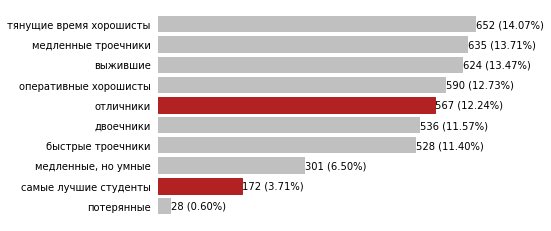

In [58]:
segments_counts = rfm['Segment'] \
    .value_counts() \
    .sort_values()

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, с in enumerate(bars):
        value = с.get_width()
        if segments_counts.index[i] in ['самые лучшие студенты', 'отличники']:
            с.set_color('firebrick')
        ax.text(value,
                с.get_y() + с.get_height() / 2,
                '{:,} ({:.2f}%)'.format(int(value),
                                   value * 100 / segments_counts.sum()),
                va='center',
                ha='left'
               )

plt.show()

По полученной диаграмме можно сделать интересные выводы.
1. Многие студенты не торопятся со сдачей экзаменов;
2. 13% студентов с трудом завершили курсы, были на грани провала;
3. Всего 3% студентов сдают экзамены быстро и на самые высокие баллы;
4. Почти половина студентов (~49.25%) имеют успеваемость выше среднего (среднее - это троечники);
5. 0.6% составляют студенты, которые прошли половину выбранных курсов.